In [ ]:
# Importando bibliotecas
import time
import struct
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import filecmp

rc = []
tempo = []

In [ ]:
def comp(arqv, limit):
  print('-------------------------------------')
  #ABRINDO ARQUIVO ORIGINAL ----------------------------------------------------
  origin = open(arqv, "rb").read()
  origin = origin.decode('latin1')

  #INICIALIZANDO DICIONÁRIO PADRÃO 0-255 E INICIANDO MARCAÇÃO DE TEMPO ---------
  start = time.time() # INICIO DO TIMER
  dicio = {}
  tamdicio = 256
  for i in range(tamdicio):
    dicio[i.to_bytes(1, 'big')] = i
  
  #COMPRESSOR LZW --------------------------------------------------------------
  simb = origin[0]
  out = []
  limit1 = pow(2,limit) 
  flag = 0

  for i in range(len(origin)):
    try:
        next = origin[i+1]
    except:
      out.append(dicio[simb.encode('latin1')])
      break

    word = simb + next

    if word.encode('latin1') in dicio:
      simb = word
      continue

    else:
      out.append(dicio[simb.encode('latin1')])

    if tamdicio < limit1:
      dicio[word.encode('latin1')] = tamdicio
      tamdicio = tamdicio + 1
    else:
      flag = 1

    simb = next

  end = time.time()   # FIM DO TIMER

  if flag == 1:
      print(f'Limite de Dicionário {limit} atingido!')
  else:
      print(f'Limite de Dicionário {limit} NÃO foi atingido!')

  compress_time = end-start
  print(f'Tempo de compressão: {compress_time} segundos.')

  #ESCREVENDO ARQUIVO COMPRIMIDO ----------------------------------------------- 
  if (arqv.split(".")[0] == 'corpus16MB') or (arqv.split(".")[0] == 'teste'):
    name = arqv.split(".")[0]+"_compress_"+str(limit)+'.txt'
  elif arqv.split(".")[0] == 'disco':
    name = arqv.split(".")[0]+"_compress_"+str(limit)+'.mp4'
  
  arquivo = open(name,'wb')
  for i in out:
        arquivo.write(struct.pack('H', i))
  arquivo.close()
  
  print(f'Usando o dicionário com limite {limit} resultou em:')
  print(f'Tamanho original: {len(origin)}, tamanho comprimido: {len(out)} (qnt de simbolos).')
  print(f'ARQUIVO COMPRIMIDO {name} CRIADO!\n')

  rc.append(len(origin)/(2*len(out)))
  tempo.append(compress_time)

  return name

In [ ]:
def decomp(arqv, limit):
  #LENDO ARQUIVO COMPRIMIDO ----------------------------------------------------
  comprimido = []
  arquivo = open(arqv, "rb").read()
  for i in range(0,len(arquivo),2):
    byte = bytearray([arquivo[i],arquivo[i+1]])
    comprimido.append(struct.unpack('H', byte)[0])

  #INICIALIZANDO DICIONÁRIO PADRÃO 0-255 E INICIANDO MARCAÇÃO DE TEMPO ---------
  start = time.time()
  dicio = {}
  for i in range(256):
    dicio[i] = chr(i)

  #DESCOMPRESSOR LZW -----------------------------------------------------------
  flag = 0
  num = 256
  decom = ''
  for i in comprimido:
    if len(dicio) <= 2**limit:
      if num > 256:    # ATUALIZA PALAVRA ANTERIOR COM A PRIMEIRA LETRA DO ATUAL
        dicio[num-1] += dicio[i][0] # IGUAL A ? DO ALGORITMO VISTO EM SALA
    else:
      flag = 1

    decom += dicio[i]
    dicio[num] = dicio[i]  # ADICIONA ELEMENTO ATUAL AO DICIONARIO
    num += 1

  end = time.time()

  if flag == 1:
    print(f'Limite de Dicionário {limit} atingido!')
  else:
    print(f'Limite de Dicionário {limit} NÃO foi atingido!')

  print(f'Tempo de descompressão: {end-start} segundos.')

  #ESCREVENDO ARQUIVO DESCOMPRIMIDO --------------------------------------------
  if (arqv.split("_")[0] == 'corpus16MB') or (arqv.split("_")[0] == 'teste'):
    name = arqv.split("_")[0]+"_decompress_"+str(limit)+'.txt'
  elif arqv.split("_")[0] == 'disco':
    name = arqv.split("_")[0]+"_decompress_"+str(limit)+'.mp4'

  #name = arqv.split("_")[0] + '_decompress_' + str(limit) + '.txt'
  decompress_arqv = open(name, 'wb')
  for i in decom:
    decompress_arqv.write(struct.pack('B', ord(i)))

  print(f'Tamanho comprimido: {len(comprimido)}, tamanho descomprimido: {len(decom)}.')
  print(f'ARQUIVO DESCOMPRIMIDO {name} CRIADO!')
  print('-------------------------------------\n\n')

In [ ]:
# MAIN

arqv1 = 'corpus16MB.txt'
arqv2 = 'disco.mp4'
arqv3 = 'teste.txt'

name_comp = ''
for i in range(9,17):
  name_comp = comp(arqv1, i)
  decomp(name_comp, i)

-------------------------------------
Limite de Dicionário 9 atingido!
Tempo de compressão: 10.653069257736206 segundos.
Usando o dicionário com limite 9 resultou em:
Tamanho original: 15637149, tamanho comprimido: 9060006 (qnt de simbolos).
ARQUIVO COMPRIMIDO corpus16MB_compress_9.txt CRIADO!

Limite de Dicionário 9 atingido!
Tempo de descompressão: 6.561182975769043 segundos.
Tamanho comprimido: 9060006, tamanho descomprimido: 15637149.
ARQUIVO DESCOMPRIMIDO corpus16MB_decompress_9.txt CRIADO!
-------------------------------------


-------------------------------------
Limite de Dicionário 10 atingido!
Tempo de compressão: 10.317514657974243 segundos.
Usando o dicionário com limite 10 resultou em:
Tamanho original: 15637149, tamanho comprimido: 7345845 (qnt de simbolos).
ARQUIVO COMPRIMIDO corpus16MB_compress_10.txt CRIADO!

Limite de Dicionário 10 atingido!
Tempo de descompressão: 5.094473361968994 segundos.
Tamanho comprimido: 7345845, tamanho descomprimido: 15637149.
ARQUIVO DESC

In [ ]:
ls -laS

total 225356
-rw-r--r-- 1 root root 18120012 Jun  2 13:49 corpus16MB_compress_9.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:50 corpus16MB_decompress_10.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:50 corpus16MB_decompress_11.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:51 corpus16MB_decompress_12.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:51 corpus16MB_decompress_13.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:51 corpus16MB_decompress_14.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:52 corpus16MB_decompress_15.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:52 corpus16MB_decompress_16.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:49 corpus16MB_decompress_9.txt
-rw-r--r-- 1 root root 15637149 Jun  2 13:43 corpus16MB.txt
-rw-r--r-- 1 root root 14691690 Jun  2 13:50 corpus16MB_compress_10.txt
-rw-r--r-- 1 root root 12265772 Jun  2 13:50 corpus16MB_compress_11.txt
-rw-r--r-- 1 root root 10665032 Jun  2 13:50 corpus16MB_compress_12.txt
-rw-r--r-- 1 root root  9412334 Jun  2 13:51 corp

In [ ]:
origin = 'corpus16MB.txt'
for i in range(9,17):
  zip = origin.split('.')[0] + '_decompress_' + str(i) + '.txt'
  if filecmp.cmp(origin, zip) == True:
    print(f'{origin} e {zip} são iguais!')

corpus16MB.txt e corpus16MB_decompress_9.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_10.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_11.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_12.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_13.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_14.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_15.txt são iguais!
corpus16MB.txt e corpus16MB_decompress_16.txt são iguais!


[0.8629767463730157, 1.0643533181002323, 1.2748605631997725, 1.4662074150363542, 1.6613465905481042, 1.8633137665604798, 2.073899591696205, 2.301222725391706]
[10.653069257736206, 10.317514657974243, 9.806235313415527, 9.701701402664185, 10.32237458229065, 10.180356979370117, 10.922850847244263, 11.952224254608154]


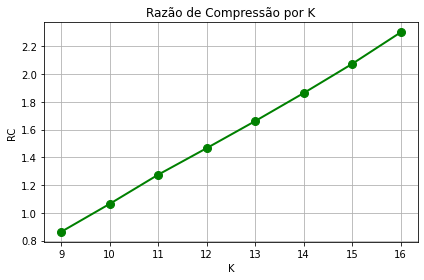

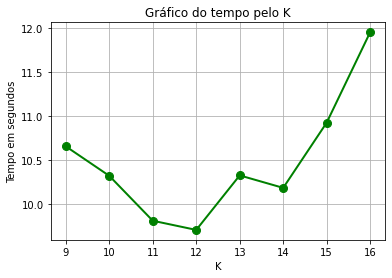

In [ ]:
print(rc)
print(tempo)

k = [9,10,11,12,13,14,15,16]

# Gráfico da razao de compressão por K
fig, ax = plt.subplots()
ax.plot(k, rc, 'go-', linewidth=2, markersize=8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set(xlabel='K', ylabel='RC', title='Razão de Compressão por K')
ax.grid()
plt.tight_layout()
plt.show()

# Gráfico do tempo por K
fig, bx = plt.subplots()
bx.plot(k, tempo, 'go-', linewidth=2, markersize=8)
bx.xaxis.set_major_locator(ticker.MultipleLocator(1))
bx.set(xlabel='K', ylabel='Tempo em segundos', title='Gráfico do tempo pelo K')
bx.grid()
plt.show()